## Στοιχεία Ομάδας

Αριθμός Ομάδας: Μ.Α.11

    > Γκαμουλάκος Παρασκευάς: 
    > Καρυπιάδης Ευστράτιος: 03114911 
    > Μήτρο Νικολάος: 

In [1]:
# import warnings
# warnings.filterwarnings('ignore')

---

## Εισαγωγή του Dataset

Το σύνολο των δεδομένων μας συλλέχθησε με τη χρήση τηλεσκοπίων *MAGIC(Major Atmospheric Gamma Imaging Cherenkov Telescopes)*. Πιο συγκεκριμένα, τα τηλεσκόπια αυτά εκμεταλλεύονται τη ραδιενέργεια *Cherenkov* που απελευθερώνεται από επιταχυνόμενα σωματίδια και συλλέγει αντίστοιχους παλμούς ραδιενέργειας, οι οποίοι προέρχονται από τη σκέδαση σωματιδίων, είτε λόγω ακτινών γάμμα, είτε λόγω ηλιακής ακτινοβολίας. Οι εικόνες που ελήφθησαν, επεξεργάστηκαν στη συνέχεια από το πρόγραμμα *Corsika*, ώστε να εξαχθούν οι αντίστοιχες μετρικές ψηφιακής περιγραφής αυτών. Τα δείγματα που έχουμε στη διάθεσή μας θα επιχειρήσουμε να τα ταξινομήσουμε σε δύο κατηγορίες, ανάλογα με το αν τα σωματίδια σκέδασης προέρχοναι από ακτινοβολία γάμμα ή από ηλιακή ακτινοβολία.

Τα δεδομένα μας περιέχονται σε ένα αρχείο .data, το οποίο θα το διαβάσουμε σε ένα DataFrame. Δεν υπάρχουν επικεφαλίδες για τα χαρακτηριστικά μας, τα οποία θα ονοματίσουμε χειροκίνητα συμβουλευόμενοι την περιγραφή των δεδομένων μας. Επίσης, δεν υπάρχει αρίθμηση για τα δείγματά μας.

In [1]:
import pandas as pd

column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'label']

pulses = pd.read_csv('data/magic04.data', names=column_names, header=None, sep=',')
pulses.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,label
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


Στη συνέχεια θα εξάγουμε χρήσιμες πληροφορίες για τα δεδομένα μας:

In [2]:
pulses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
fLength     19020 non-null float64
fWidth      19020 non-null float64
fSize       19020 non-null float64
fConc       19020 non-null float64
fConc1      19020 non-null float64
fAsym       19020 non-null float64
fM3Long     19020 non-null float64
fM3Trans    19020 non-null float64
fAlpha      19020 non-null float64
fDist       19020 non-null float64
label       19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [3]:
pulses.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [4]:
pulses.shape

(19020, 11)

Παρατηρούμε ότι έχουμε στη διάθεσή μας 19020 δείγματα, κάθε ένα από τα οποία προσδιορίζεται από 10 χαρακτηριστικά. Τα χαρακτηριστικά αυτά βρίσκονται όλα σε αριθμητική μορφή, ενώ δεν έχουμε απουσιάζουσες τιμές για κανένα από αυτά. Η τελευταία στήλη των δεδομένων μας αντιστοιχεί στην ετικέτα της κατηγορίας, στην οποία ανήκει κάθε αντίστοιχο δείγμα. Σημειώνουμε ότι οι ετικέτες μας είναι σε μορφή κειμένου, γεγονός το οποίο δε χρήζει απαραίτητη την αριθμητική τους κωδικοποίηση δεδομένου ότι είναι διαφορετικές μεταξύ τους.

In [5]:
pulses['label'].value_counts(normalize=True) * 100

g    64.837014
h    35.162986
Name: label, dtype: float64

Οι κατηγορίες των παλμών είναι 2 και φέρουν τις ετικέτες *g(gamma)* και *h(hadron)*. Παρατηρούμε επίσης ότι τα 2/3 περίπου των δεδομένων μας αντιστοιχούν σε δείγματα της κατηγορίας g και αντίστοιχα το 1/3 αυτών στην κατηγορία h, καθιστώντας το dataset μας μη-ισορροπημένο. Το γεγονός αυτό θα πρέπει να το λάβουμε υπόψην, προτού προχωρήσουμε στο διαχωρισμό και την εκπαίδευση των ταξινομητών μας.

---

## Διαχωρισμός Δεδομένων Εκπαίδευσης & Ελέγχου

Αρχικά θα διαχωρίσουμε τα δεδομένα σε εκπαίδευσης και ελέγχου χρησιμοποιώντας τη συνάρτηση *ShuffleSplit*. Θα ακολουθήσουμε ποσοστό δεδομένων ελέγχου 30%:

In [6]:
import numpy as np
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits = 1, test_size = 0.3, random_state=42)
for train_index, test_index in split.split(pulses, pulses['label']):
    train_set = pulses.reindex(train_index)
    test_set = pulses.reindex(test_index)
    
train_set['label'].value_counts() / len(train_set) * 100

g    64.796455
h    35.203545
Name: label, dtype: float64

<font color='red'> Σημειώνουμε ότι χρησιμοποιήσαμε την παράμετρο *random_state* για το διαχωρισμό των δεδομένων μας προκειμένου να μην αλλάζουμε συνεχώς κομμάτια αναφοράς του Notebook, όπου επικαλούμαστε αριθμητικά δεδομένα των μοντέλων μας. </font>

Παρατηρούμε ότι η ανισορροπία του dataset αποτυπώνεται και στα διαχωρισμένα σύνολα που δημιουργήσαμε. Δεδομένου ότι έχουμε ένα πλήθος 19020 δειγμάτων θα ακολουθήσουμε την τεχνική του *Undersampling* ώστε να μειώσουμε το χρόνο εκπαίδευσης των μοντέλων ταξινομητών. Η τεχνική αυτή θα εφαρμοστεί αποκλειστικά στα δεδομένα εκπαίδευσης. Σημειώνουμε ότι προφανώς ελλοχεύει ο κίνδυνος ξεσκαρταρίσματος χρήσιμης πληροφορίας.

Προτού προχωρήσουμε θα διαχωρίσουμε τα δεδομένα μας από την ετικέτα της κατηγορίας στην οποία ανήκουν:

In [7]:
# Training Set
pulses_train = train_set.drop('label', axis=1)
pulses_train_labels = train_set['label'].copy()

# Test Set
pulses_test = test_set.drop('label', axis=1)
pulses_test_labels = test_set['label'].copy()

In [8]:
pulses_train.shape

(13314, 10)

Συνεχίζουμε με τον *RandomUnderSampler*:

In [9]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
pulses_train, pulses_train_labels = rus.fit_resample(pulses_train, pulses_train_labels)

Using TensorFlow backend.


In [10]:
pulses_train.shape

(9374, 10)

In [11]:
Counter(pulses_train_labels)

Counter({'g': 4687, 'h': 4687})

Με την παραπάνω διαδικασία χάσαμε περίπου 4000 δείγματα, αλλά εξισορροπήσαμε τα δεδομένα εκπαίδευσής ως προς τις δύο κατηγορίες.

---

## Baseline Classification

#### DummyClassifier

Αρχικά θα εκπαιδεύσουμε έναν _DummyClassifier_ χωρίς να μεταβάλλουμε τις παραμέτρους αρχικοποίησής του:

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dc_default = DummyClassifier() # default strategy: stratified
dc_default.fit(pulses_train, pulses_train_labels) # fitting on train_set

pulses_predictions = dc_default.predict(pulses_test) # predicting on test_set

target_names = dc_default.classes_.tolist() # fetch class names

dummy_default = accuracy_score(pulses_test_labels, pulses_predictions) * 100

In [13]:
dummy_default

50.403084472485105

Η ακρίβεια ενός προεπιλεγμένου *DummyClassifier* ανέρχεται σε ποσοστό περίπου 50%.

Συνεχίζοντας, θα πάρουμε περισσότερες πληροφόριες για τη διαδικασία ταξινόμησης, υπολογίζοντας _Confusion Table_ καθώς και τις τιμές _Precision, Recall_ και _F1-Score_ :

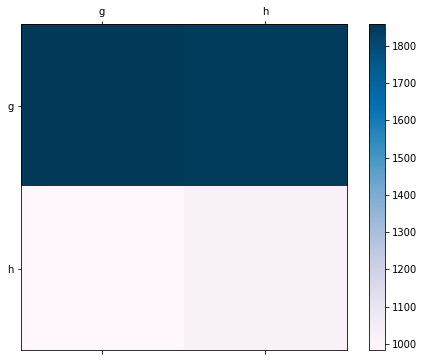

In [15]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(pulses_test_labels, pulses_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

dc_f1_micro = f1_score(pulses_test_labels, pulses_predictions, average='micro')
dc_f1_macro = f1_score(pulses_test_labels, pulses_predictions, average='macro')

print("F1-Micro Average: " + str(dc_f1_micro))
print("F1-Macro Average: " + str(dc_f1_macro) + "\n")

print(classification_report(pulses_test_labels, pulses_predictions))

F1-Micro Average: 0.504030844724851
F1-Macro Average: 0.49304419863901605

              precision    recall  f1-score   support

           g       0.65      0.50      0.57      3705
           h       0.36      0.51      0.42      2001

    accuracy                           0.50      5706
   macro avg       0.50      0.51      0.49      5706
weighted avg       0.55      0.50      0.52      5706



Μελετώντας τον πίνακα σύγχυσης βλέπουμε ότι ο ταξινομήτης μας ανταποκρίνεται καλύτερα στην ταξινόμηση των δειγμάτων κατηγορίας g, καθώς οι TP τιμές για την κατηγορία h έχουν μικρές τιμές. Σημειώνουμε επίσης ότι η κατηγορία g χαρακτηρίζεται και από υψηλές τιμές FP, δηλαδή πολλά δείγματα ταξινομήθηκαν λάθος στη δεδομένη κατηγορία.

Παρατηρούμε ότι οι τιμές των *F1-Micro* και *F1-Macro* έχουν μικρή αριθμητική διαφορά μεταξύ τους. H *F1-Macro* είναι λίγο μικρότερη από εκείνη της *F1-Micro*, επειδή επηρεάζεται περισσότερο από τη μικρή απόδοση σε ότι αφορά την ακρίβεια και την ανάκλιση της κατηγορίας h, καθώς και από το μικρότερο πλήθος δειγμάτων της.

Σημειώνουμε επίσης ότι η κατηγορία g έχει τις υψηλότερες τιμές ακρίβειας και ανάκλισης με τον ταξινομητή να είναι σωστός στο 64% των περιπτώσεων όταν εκτιμά πως κάποιο δείγμα ανήκει στη συγκεκριμένη κατηγορία. Επίσης, από το σύνολο των δειγμάτων g, μπορεί να αγνωρίσει τα μισά από αυτά. Αν και η κατηγορία h χαρακτηρίζεται από χαμηλότερες αποδόσεις, αξίζει να παρατηρήσουμε ότι κατά την ταξινόμηση εξετάζουμε και λιγότερα δείγματα αυτής.

#### KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # default n: 5
knn.fit(pulses_train, pulses_train_labels) # fitting on train_set

pulses_predictions = knn.predict(pulses_test) # predicting on test_set

target_names = knn.classes_.tolist() # fetch class names

knn_default = accuracy_score(pulses_test_labels, pulses_predictions) * 100

In [18]:
knn_default

78.46126883981773

Η ακρίβεια σε αυτήν την περίπτωση είναι αισθητά υψηλότερη από προηγουμένως με ποσοστό ακρίβειας 78% περίπου. Ας εξετάσουμε τις ανάλογες μετρικές απόδοσης:

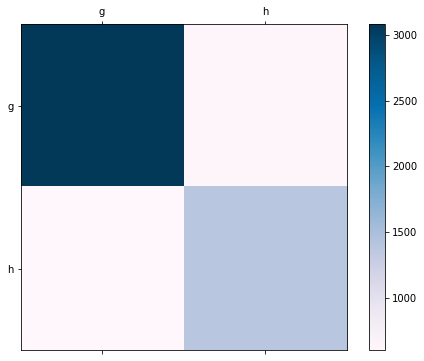

In [19]:
matrix = confusion_matrix(pulses_test_labels, pulses_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [20]:
kn_f1_micro = f1_score(pulses_test_labels, pulses_predictions, average='micro')
kn_f1_macro = f1_score(pulses_test_labels, pulses_predictions, average='macro')

print("F1-Micro Average: " + str(kn_f1_micro))
print("F1-Macro Average: " + str(kn_f1_macro) + "\n")

print(classification_report(pulses_test_labels, pulses_predictions))

F1-Micro Average: 0.7846126883981773
F1-Macro Average: 0.7640891306171003

              precision    recall  f1-score   support

           g       0.84      0.83      0.83      3705
           h       0.69      0.70      0.69      2001

    accuracy                           0.78      5706
   macro avg       0.76      0.76      0.76      5706
weighted avg       0.79      0.78      0.78      5706



Ο πίνακας σύγχυσης για αυτόν τον ταξινομητή έχει πιο έντονες τιμές στις διαγωνίους του, στοιχείο που υποδεικνύει μία σχετικά καλύτερη απόδοση από προηγουμένως. Αξίζει να παρατηρήσουμε ότι λίγοτερα δείγματα της κατηγορίας h ταξινομούνται σωστά.

Και σε αυτή την περίπτωση παρατηρούμε μία μικρή διαφορά μεταξύ *F1-Micro* και *F1-Macro*. Αυτό οφείλεται και πάλι στην κατηγορία h, η οποία χαρακτηρίζεται από λιγότερα δείγματα, ενώ παρουσιάζει αισθητά χαμηλότερες τιμές ακρίβειας και ανάκλισης σε σύγκριση με την κατηγορία g. Ως αποτέλεσμα το *F1-score* είναι χαμηλότερο από εκείνο της g και κατά συνέπεια επηρεάζει αρνητικά το *Macro-Averaging*.

Όπως και στον προηγούμενο ταξινομητή παρατηρούμε ότι οι αποδόσεις για την κατηγορία g είναι οι υψηλότερες του μοντέλου. Αντίθετα ο ταξινομητής μας μπορεί να αναγνωρίσει το 69% των δειγμάτων κατηγορίας h, ενώ για κάθε αντίστοιχη εκτίμηση είναι σωστός στο 70% των περιπτώσεων.

#### GaussianNBClassifier

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(pulses_train, pulses_train_labels) # fitting on train_set

pulses_predictions = gnb.predict(pulses_test) # predicting on test_set

target_names = gnb.classes_.tolist() # fetch class names

gnb_default = accuracy_score(pulses_test_labels, pulses_predictions) * 100

In [22]:
gnb_default

72.55520504731862

Η ακρίβεια για τον ταξινομητή μας ανέρχεται σε περίπου 72%.

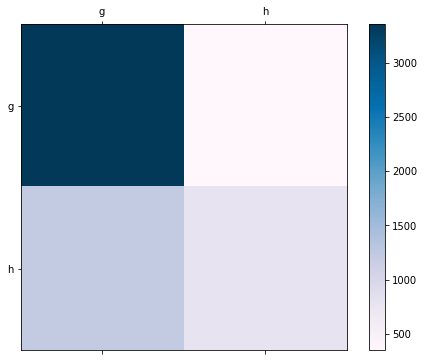

In [23]:
matrix = confusion_matrix(pulses_test_labels, pulses_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [24]:
gnb_f1_micro = f1_score(pulses_test_labels, pulses_predictions, average='micro')
gnb_f1_macro = f1_score(pulses_test_labels, pulses_predictions, average='macro')

print("F1-Micro Average: " + str(gnb_f1_micro))
print("F1-Macro Average: " + str(gnb_f1_macro) + "\n")

print(classification_report(pulses_test_labels, pulses_predictions))

F1-Micro Average: 0.7255520504731862
F1-Macro Average: 0.6557079543997397

              precision    recall  f1-score   support

           g       0.73      0.91      0.81      3705
           h       0.69      0.39      0.50      2001

    accuracy                           0.73      5706
   macro avg       0.71      0.65      0.66      5706
weighted avg       0.72      0.73      0.70      5706



Από τον πίνακα σύγχυσης σημειώνουμε ότι δείγματα g ταξινομούνται σωστά στην αντίστοιχη κατηγορία, ενώ έχουμε ένα μεγάλο πλήθος FN για την κατηγορία h, στοιχείο το οποίο αποτυπώνεται και στις αντίστοιχες μετρικές *F1*.

Εδώ παρατηρούμε αισθητή διαφορά για τις τιμές των *F1-Micro* και *F1-Macro* των ταξινομητών μας. Πιο συγκεκριμένα το *F1-score* για την κατηγορία h είναι πολύ χαμηλότερο από εκείνο της g, λόγω της χαμηλής απόδοσης της κατηγορίας σε ότι αφορά την ανάκλισή της. Κατά συνέπεια το *F1-Macro-Averaging* επηρεάζεται πόλυ περισσότερο από τη χαμηλότερη αυτή τιμή και σε συνδυασμό με τα λιγότερα δείγματα της κατηγορίας, επιδρά αρνητικά στο συνολικό *F1-Macro-Average*.

Αξίζει να σημειώσουμε ότι ο συγκεκριμένος ταξινομητής είναι ικανός να αναγνωρίσει το 90% των δειγμάτων g και μόλις το 40% περίπου των h, με τις αντίστοιχες τιμές ακριβείας να είναι παραπλήσιες στο 73% και 68% περίπου, αντίστοιχα.

#### MLPClassifier

In [25]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(pulses_train, pulses_train_labels) # fitting on train_set

pulses_predictions = mlp.predict(pulses_test) # predicting on test_set

target_names = mlp.classes_.tolist() # fetch class names

mlp_default = accuracy_score(pulses_test_labels, pulses_predictions) * 100

In [26]:
mlp_default

75.28916929547844

Σημειώνουμε ακρίβεια της τάξης του 75% περίπου.

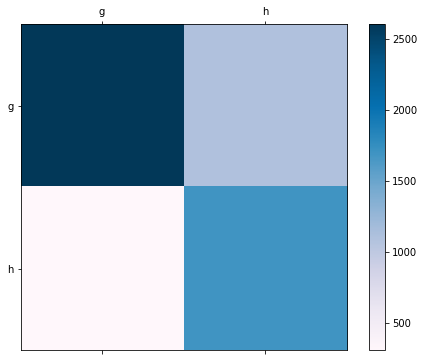

In [27]:
matrix = confusion_matrix(pulses_test_labels, pulses_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [28]:
mlp_f1_micro = f1_score(pulses_test_labels, pulses_predictions, average='micro')
mlp_f1_macro = f1_score(pulses_test_labels, pulses_predictions, average='macro')

print("F1-Micro Average: " + str(mlp_f1_micro))
print("F1-Macro Average: " + str(mlp_f1_macro) + "\n")

print(classification_report(pulses_test_labels, pulses_predictions))

F1-Micro Average: 0.7528916929547845
F1-Macro Average: 0.746471699162021

              precision    recall  f1-score   support

           g       0.89      0.70      0.79      3705
           h       0.61      0.85      0.71      2001

    accuracy                           0.75      5706
   macro avg       0.75      0.77      0.75      5706
weighted avg       0.79      0.75      0.76      5706



Ο πίνακας σύγχυσης για το συγκεκριμένο ταξινομητή δείχνει καλή ακρίβεια για τις δύο κατηγορίες, με την κατηγορία g να χαρακτηρίζεται από ένα αξιοσημείωτο πλήθος FP τιμών. Επίσης, παρατηρούμε ότι η κατηγορία h χαρακτηρίζεται από μικρό αριθμό, όχι μόνο TP τιμών, αλλά και FN τιμών.

Οι τιμές μας για *F1-Micro* και *F1-Macro* είναι για ακόμη μία φορά παραπλήσιες. Η ελάχιστα χαμηλότερη τιμή του *F1-Macro-Score* αποδείδεται στη χαμηλότερες τιμές ακρίβειας και ανάκλισης της κατηγορίας g, αλλά και στο μικρότερο πλήθος δειγμάτων της.

Τέλος, επιβεβαιώνουμε ότι η ταξινόμηση δειγμάτων g χαρακτηρίζεται και σε αυτόν τον ταξινομητή από υψηλότερες αποδόσεις με τιμές ακρίβειας και ανάκλισης 85% και 88%, αντίστοιχα.

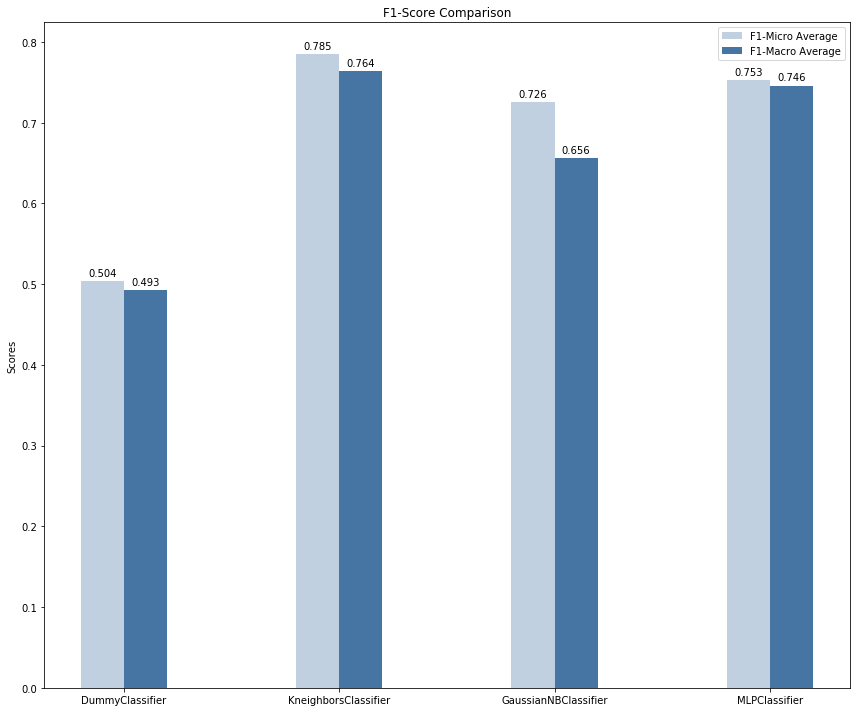

In [33]:
# Grouped BarPlot source: https://bit.ly/36y14Sw

labels = ['DummyClassifier', 'KneighborsClassifier', 'GaussianNBClassifier', 'MLPClassifier']
f1_micro = [round(dc_f1_micro, 3), round(kn_f1_micro, 3), round(gnb_f1_micro, 3), round(mlp_f1_micro, 3)]
f1_macro = [round(dc_f1_macro, 3), round(kn_f1_macro, 3), round(gnb_f1_macro, 3), round(mlp_f1_macro, 3)]

width = 0.20
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 10))
rect1 = ax.bar(x-width/2, f1_micro, width, label='F1-Micro Average', color=(0.2, 0.4, 0.6, 0.3))
rect2 = ax.bar(x+width/2, f1_macro, width, label='F1-Macro Average', color=(0.2, 0.4, 0.6, 0.9))

ax.legend()
ax.set_xticks(x)
ax.set_ylabel('Scores')
ax.set_xticklabels(labels)
ax.set_title('F1-Score Comparison')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x()+rect.get_width()/2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
fig.tight_layout()

plt.show()

---

## Βελτίωση Ταξινομητών

---

## Τελική Αρχιτεκτονική Μετασχηματιστών